In [1]:
import keras
import pandas as pd
import numpy as np
import os
import sys
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
def load_dataset(input_file):
    df = pd.read_csv(input_file)
    X = []
    Y = []
    for i in range(1, df.shape[0]):
        X.append([df['Open'][i-1], df['sentiment'][i-1]])
        Y.append([df['Open'][i]])
    return X, Y

In [3]:
def transform_data(X, Y):
    scaler = MinMaxScaler(feature_range=(0, 1))
    X = scaler.fit_transform(X)
    Y = scaler.fit_transform(Y)
    
    return X, Y, scaler

In [4]:
def get_train_test(X, Y, num_test):
    X = np.array(X)
    Y = np.array(Y)
    
    indices = [range(X.shape[0])]
    
    np.random.shuffle(indices)
    np.random.shuffle(indices)
    
    X = X[indices]
    Y = Y[indices]
    
    train_X = X[:-num_test]
    train_Y = Y[:-num_test]
    
    test_X = X[-num_test:]
    test_Y = Y[-num_test:]
    
    return train_X, train_Y, test_X, test_Y

In [5]:
stock_sentiment_filename = 'APPL_stock_sentiments_2019-03-15_2019-04-15.csv'

data_path = os.path.join(os.path.dirname(os.getcwd()), 'data', stock_sentiment_filename)

X, Y = load_dataset(data_path)
X, Y, scaler = transform_data(X, Y)
train_X, train_Y, test_X, test_Y = get_train_test(X, Y, 5)

train_X = train_X.reshape(train_X.shape[0], 1, train_X.shape[1])
test_X = test_X.reshape(test_X.shape[0], 1, test_X.shape[1])

C:\Users\Shadow\Anaconda3\envs\StockPricePrediction\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Shadow\Anaconda3\envs\StockPricePrediction\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # This is added back by InteractiveShellApp.init_path()


In [6]:
train_X, train_Y, test_X, test_Y

(array([[[0.        , 0.02105203]],
 
        [[0.059375  , 0.2628659 ]],
 
        [[0.21875   , 0.77910095]],
 
        [[0.08625   , 0.73737238]],
 
        [[0.323125  , 0.62052233]],
 
        [[0.655625  , 0.25419378]],
 
        [[0.41625   , 0.99035478]],
 
        [[0.425875  , 1.        ]],
 
        [[0.24375   , 0.99235564]],
 
        [[0.25625   , 0.58704039]],
 
        [[0.31125   , 0.46423342]],
 
        [[0.424375  , 0.26619939]],
 
        [[0.39      , 0.55414637]],
 
        [[0.525     , 0.36145516]],
 
        [[0.62125   , 0.        ]],
 
        [[0.725     , 0.49394127]]]), array([[0.        ],
        [0.16943522],
        [0.02857143],
        [0.28039867],
        [0.63388704],
        [0.37940199],
        [0.38963455],
        [0.19601329],
        [0.20930233],
        [0.26777409],
        [0.38803987],
        [0.35149502],
        [0.49501661],
        [0.59734219],
        [0.7076412 ],
        [0.70564784]]), array([[[0.723125  , 0.04150135]],
 
  

In [7]:
def create_model(num_features):
    model = keras.Sequential()
    model.add(keras.layers.LSTM(100, input_shape=(1, num_features)))
    model.add(keras.layers.Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [83]:
model = create_model(2)

In [84]:
model_output = model.fit(train_X, train_Y, epochs=8000, batch_size=1, verbose=1)

Epoch 1/8000
16/16 [==============================] - 2s 118ms/step - loss: 0.1516
Epoch 2/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0955
Epoch 3/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0624
Epoch 4/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0472
Epoch 5/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0407
Epoch 6/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0384
Epoch 7/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0372
Epoch 8/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0353
Epoch 9/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0360
Epoch 10/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0324
Epoch 11/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0311
Epoch 12/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0306
Epoch 13/8000
16/16 [==

Epoch 101/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0198
Epoch 102/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0197
Epoch 103/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0203
Epoch 104/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0196
Epoch 105/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0196
Epoch 106/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0197
Epoch 107/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0194
Epoch 108/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0196
Epoch 109/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0195
Epoch 110/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0196
Epoch 111/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0193
Epoch 112/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0196
Epoc

16/16 [==============================] - 0s 3ms/step - loss: 0.0192
Epoch 200/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0198
Epoch 201/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0191
Epoch 202/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0200
Epoch 203/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0192
Epoch 204/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0195
Epoch 205/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0192
Epoch 206/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0193
Epoch 207/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0192
Epoch 208/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0188
Epoch 209/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0198
Epoch 210/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0193
Epoch 211/8000
16/1

16/16 [==============================] - 0s 3ms/step - loss: 0.0184
Epoch 298/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0190
Epoch 299/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0184
Epoch 300/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0184
Epoch 301/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0191
Epoch 302/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0182
Epoch 303/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0182
Epoch 304/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0195
Epoch 305/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0185
Epoch 306/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0185
Epoch 307/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0190
Epoch 308/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0194
Epoch 309/8000
16/1

16/16 [==============================] - 0s 3ms/step - loss: 0.0179
Epoch 396/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0189
Epoch 397/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0182
Epoch 398/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0181
Epoch 399/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0180
Epoch 400/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0189
Epoch 401/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0179
Epoch 402/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0191
Epoch 403/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0181
Epoch 404/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0182
Epoch 405/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0179
Epoch 406/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0181
Epoch 407/8000
16/1

16/16 [==============================] - 0s 3ms/step - loss: 0.0174
Epoch 494/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0185
Epoch 495/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0175
Epoch 496/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0176
Epoch 497/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0180
Epoch 498/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0194
Epoch 499/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0177
Epoch 500/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0175
Epoch 501/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0173
Epoch 502/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0185
Epoch 503/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0178
Epoch 504/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0178
Epoch 505/8000
16/1

16/16 [==============================] - 0s 3ms/step - loss: 0.0170
Epoch 592/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0171
Epoch 593/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0171
Epoch 594/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0170
Epoch 595/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0174
Epoch 596/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0175
Epoch 597/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0183
Epoch 598/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0170
Epoch 599/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0179
Epoch 600/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0175
Epoch 601/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0172
Epoch 602/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0173
Epoch 603/8000
16/1

16/16 [==============================] - 0s 3ms/step - loss: 0.0172
Epoch 690/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0188
Epoch 691/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0178
Epoch 692/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0177
Epoch 693/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0177
Epoch 694/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0169
Epoch 695/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0177
Epoch 696/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0177
Epoch 697/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0169
Epoch 698/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0167
Epoch 699/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0170
Epoch 700/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0172
Epoch 701/8000
16/1

16/16 [==============================] - 0s 3ms/step - loss: 0.0174
Epoch 788/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0170
Epoch 789/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0170
Epoch 790/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0171
Epoch 791/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 792/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0179
Epoch 793/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0172
Epoch 794/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0169
Epoch 795/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 796/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0172
Epoch 797/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0178
Epoch 798/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 799/8000
16/1

16/16 [==============================] - 0s 3ms/step - loss: 0.0173
Epoch 886/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 887/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 888/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0169
Epoch 889/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0179
Epoch 890/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 891/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0183
Epoch 892/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0170
Epoch 893/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0170
Epoch 894/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 895/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0171
Epoch 896/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0169
Epoch 897/8000
16/1

16/16 [==============================] - 0s 3ms/step - loss: 0.0173
Epoch 984/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0175
Epoch 985/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0171
Epoch 986/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0169
Epoch 987/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 988/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 989/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0169
Epoch 990/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0169
Epoch 991/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0173
Epoch 992/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0178
Epoch 993/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0167
Epoch 994/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 995/8000
16/1

16/16 [==============================] - 0s 3ms/step - loss: 0.0177
Epoch 1081/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 1082/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0172
Epoch 1083/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0189
Epoch 1084/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0178
Epoch 1085/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0169
Epoch 1086/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0169
Epoch 1087/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0175
Epoch 1088/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0172
Epoch 1089/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0171
Epoch 1090/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 1091/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 10

16/16 [==============================] - 0s 3ms/step - loss: 0.0167
Epoch 1178/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0170
Epoch 1179/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 1180/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0169
Epoch 1181/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0170
Epoch 1182/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 1183/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0167
Epoch 1184/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0169
Epoch 1185/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0180
Epoch 1186/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 1187/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 1188/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0170
Epoch 11

16/16 [==============================] - 0s 3ms/step - loss: 0.0170
Epoch 1275/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0167
Epoch 1276/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 1277/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0170
Epoch 1278/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0176
Epoch 1279/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 1280/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0167
Epoch 1281/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 1282/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0172
Epoch 1283/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 1284/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0167
Epoch 1285/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0174
Epoch 12

16/16 [==============================] - 0s 3ms/step - loss: 0.0173
Epoch 1372/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 1373/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0171
Epoch 1374/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0167
Epoch 1375/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0172
Epoch 1376/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 1377/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0170
Epoch 1378/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0174
Epoch 1379/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0163
Epoch 1380/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0171
Epoch 1381/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0170
Epoch 1382/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 13

16/16 [==============================] - 0s 3ms/step - loss: 0.0167
Epoch 1469/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 1470/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0174
Epoch 1471/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0167
Epoch 1472/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0167
Epoch 1473/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0167
Epoch 1474/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0171
Epoch 1475/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0171
Epoch 1476/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 1477/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 1478/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0170
Epoch 1479/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0167
Epoch 14

16/16 [==============================] - 0s 3ms/step - loss: 0.0167
Epoch 1566/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 1567/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 1568/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 1569/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 1570/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 1571/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 1572/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 1573/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 1574/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 1575/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 1576/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0171
Epoch 15

16/16 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 1663/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0171
Epoch 1664/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 1665/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0183
Epoch 1666/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0172
Epoch 1667/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0180
Epoch 1668/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0163
Epoch 1669/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 1670/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 1671/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 1672/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 1673/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0167
Epoch 16

16/16 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 1760/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 1761/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 1762/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0181
Epoch 1763/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0162
Epoch 1764/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 1765/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0171
Epoch 1766/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0169
Epoch 1767/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0176
Epoch 1768/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 1769/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 1770/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0175
Epoch 17

16/16 [==============================] - 0s 3ms/step - loss: 0.0169
Epoch 1857/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0169
Epoch 1858/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0184
Epoch 1859/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 1860/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0169
Epoch 1861/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 1862/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0171
Epoch 1863/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0167
Epoch 1864/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 1865/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 1866/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0167
Epoch 1867/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0175
Epoch 18

16/16 [==============================] - 0s 3ms/step - loss: 0.0171
Epoch 1954/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 1955/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0174
Epoch 1956/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 1957/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 1958/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 1959/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 1960/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 1961/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0167
Epoch 1962/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 1963/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0169
Epoch 1964/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0172
Epoch 19

16/16 [==============================] - 0s 3ms/step - loss: 0.0179
Epoch 2051/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0169
Epoch 2052/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 2053/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0180
Epoch 2054/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0181
Epoch 2055/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0163
Epoch 2056/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 2057/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 2058/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 2059/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 2060/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 2061/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0172
Epoch 20

16/16 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 2148/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 2149/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0171
Epoch 2150/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0162
Epoch 2151/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 2152/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 2153/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 2154/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 2155/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 2156/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0163
Epoch 2157/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0173
Epoch 2158/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0171
Epoch 21

16/16 [==============================] - 0s 3ms/step - loss: 0.0173
Epoch 2245/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 2246/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 2247/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 2248/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0171
Epoch 2249/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 2250/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0169
Epoch 2251/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 2252/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0177
Epoch 2253/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 2254/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 2255/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 22

16/16 [==============================] - 0s 3ms/step - loss: 0.0167
Epoch 2342/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0173
Epoch 2343/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0173
Epoch 2344/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 2345/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 2346/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 2347/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0163
Epoch 2348/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0167
Epoch 2349/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0170
Epoch 2350/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0163
Epoch 2351/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0172
Epoch 2352/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0175
Epoch 23

16/16 [==============================] - 0s 3ms/step - loss: 0.0172
Epoch 2439/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0167
Epoch 2440/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 2441/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0163
Epoch 2442/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0171
Epoch 2443/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 2444/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0167
Epoch 2445/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0173
Epoch 2446/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 2447/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 2448/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 2449/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0169
Epoch 24

16/16 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 2536/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0163
Epoch 2537/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 2538/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 2539/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0171
Epoch 2540/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0163
Epoch 2541/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 2542/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 2543/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0167
Epoch 2544/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0167
Epoch 2545/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 2546/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 25

16/16 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 2633/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0173
Epoch 2634/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 2635/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0170
Epoch 2636/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 2637/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0160
Epoch 2638/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0171
Epoch 2639/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0167
Epoch 2640/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 2641/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 2642/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 2643/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0163
Epoch 26

16/16 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 2730/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 2731/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 2732/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 2733/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 2734/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0167
Epoch 2735/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 2736/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 2737/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 2738/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0167
Epoch 2739/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 2740/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 27

16/16 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 2827/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 2828/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 2829/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0169
Epoch 2830/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 2831/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 2832/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0167
Epoch 2833/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0162
Epoch 2834/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0163
Epoch 2835/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 2836/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 2837/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 28

16/16 [==============================] - 0s 3ms/step - loss: 0.0170
Epoch 2924/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 2925/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0167
Epoch 2926/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 2927/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 2928/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0163
Epoch 2929/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0167
Epoch 2930/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0162
Epoch 2931/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 2932/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 2933/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 2934/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0163
Epoch 29

16/16 [==============================] - 0s 3ms/step - loss: 0.0175
Epoch 3021/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0163
Epoch 3022/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0161
Epoch 3023/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 3024/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0163
Epoch 3025/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 3026/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0177
Epoch 3027/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0167
Epoch 3028/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 3029/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0163
Epoch 3030/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 3031/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0171
Epoch 30

16/16 [==============================] - 0s 3ms/step - loss: 0.0162
Epoch 3118/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0163
Epoch 3119/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 3120/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 3121/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 3122/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0167
Epoch 3123/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0162
Epoch 3124/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 3125/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 3126/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 3127/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 3128/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 31

16/16 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 3215/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 3216/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 3217/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 3218/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 3219/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 3220/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 3221/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 3222/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 3223/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 3224/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0163
Epoch 3225/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0163
Epoch 32

16/16 [==============================] - 0s 3ms/step - loss: 0.0173
Epoch 3312/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0169
Epoch 3313/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0163
Epoch 3314/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 3315/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0162
Epoch 3316/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 3317/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 3318/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 3319/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 3320/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0173
Epoch 3321/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0162
Epoch 3322/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0163
Epoch 33

16/16 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 3409/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 3410/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0163
Epoch 3411/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0162
Epoch 3412/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 3413/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 3414/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0167
Epoch 3415/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 3416/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0163
Epoch 3417/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 3418/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 3419/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0171
Epoch 34

16/16 [==============================] - 0s 3ms/step - loss: 0.0170
Epoch 3506/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0176
Epoch 3507/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 3508/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 3509/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0163
Epoch 3510/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0163
Epoch 3511/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0169
Epoch 3512/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0163
Epoch 3513/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0163
Epoch 3514/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 3515/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0163
Epoch 3516/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 35

16/16 [==============================] - 0s 3ms/step - loss: 0.0167
Epoch 3603/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0162
Epoch 3604/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 3605/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0163
Epoch 3606/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0161
Epoch 3607/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 3608/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0160
Epoch 3609/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0162
Epoch 3610/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 3611/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0162
Epoch 3612/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 3613/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 36

16/16 [==============================] - 0s 3ms/step - loss: 0.0159
Epoch 3700/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0159
Epoch 3701/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0158
Epoch 3702/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0158
Epoch 3703/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0156
Epoch 3704/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0157
Epoch 3705/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0162
Epoch 3706/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0158
Epoch 3707/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0159
Epoch 3708/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0159
Epoch 3709/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0160
Epoch 3710/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0158
Epoch 37

16/16 [==============================] - 0s 3ms/step - loss: 0.0151
Epoch 3797/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0152
Epoch 3798/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0152
Epoch 3799/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0152
Epoch 3800/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0155
Epoch 3801/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0155
Epoch 3802/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0152
Epoch 3803/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0153
Epoch 3804/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0152
Epoch 3805/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0152
Epoch 3806/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0161
Epoch 3807/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0150
Epoch 38

16/16 [==============================] - 0s 3ms/step - loss: 0.0145
Epoch 3894/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0146
Epoch 3895/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0144
Epoch 3896/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0145
Epoch 3897/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0147
Epoch 3898/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0144
Epoch 3899/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0143
Epoch 3900/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0144
Epoch 3901/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0143
Epoch 3902/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0144
Epoch 3903/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0149
Epoch 3904/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0145
Epoch 39

16/16 [==============================] - 0s 3ms/step - loss: 0.0138
Epoch 3991/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0142
Epoch 3992/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0139
Epoch 3993/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0137
Epoch 3994/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0137
Epoch 3995/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0138
Epoch 3996/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0137
Epoch 3997/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0136
Epoch 3998/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0134
Epoch 3999/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0137
Epoch 4000/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0135
Epoch 4001/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0140
Epoch 40

16/16 [==============================] - 0s 3ms/step - loss: 0.0130
Epoch 4088/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0130
Epoch 4089/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0128
Epoch 4090/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0130
Epoch 4091/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0133
Epoch 4092/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0132
Epoch 4093/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0131
Epoch 4094/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0133
Epoch 4095/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0130
Epoch 4096/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0126
Epoch 4097/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0128
Epoch 4098/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0126
Epoch 40

16/16 [==============================] - 0s 3ms/step - loss: 0.0120
Epoch 4185/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0122
Epoch 4186/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0124
Epoch 4187/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0119
Epoch 4188/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0119
Epoch 4189/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0121
Epoch 4190/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0118
Epoch 4191/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 4192/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0120
Epoch 4193/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0121
Epoch 4194/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0119
Epoch 4195/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0118
Epoch 41

16/16 [==============================] - 0s 3ms/step - loss: 0.0112
Epoch 4282/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0115
Epoch 4283/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0114
Epoch 4284/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0119
Epoch 4285/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0117
Epoch 4286/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0112
Epoch 4287/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0119
Epoch 4288/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0110
Epoch 4289/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0113
Epoch 4290/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0114
Epoch 4291/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0119
Epoch 4292/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0113
Epoch 42

16/16 [==============================] - 0s 3ms/step - loss: 0.0110
Epoch 4379/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0116
Epoch 4380/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0107
Epoch 4381/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0109
Epoch 4382/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0111
Epoch 4383/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0116
Epoch 4384/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 4385/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0117
Epoch 4386/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 4387/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 4388/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0111
Epoch 4389/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 43

16/16 [==============================] - 0s 3ms/step - loss: 0.0110
Epoch 4476/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0125
Epoch 4477/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0113
Epoch 4478/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0106
Epoch 4479/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0107
Epoch 4480/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0104
Epoch 4481/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0104
Epoch 4482/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0105
Epoch 4483/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0107
Epoch 4484/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0106
Epoch 4485/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0105
Epoch 4486/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0107
Epoch 44

16/16 [==============================] - 0s 3ms/step - loss: 0.0103
Epoch 4573/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 4574/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0105
Epoch 4575/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 4576/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 4577/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0101
Epoch 4578/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0101
Epoch 4579/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0104
Epoch 4580/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0104
Epoch 4581/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0107
Epoch 4582/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0101
Epoch 4583/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0104
Epoch 45

16/16 [==============================] - 0s 3ms/step - loss: 0.0103
Epoch 4670/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0106
Epoch 4671/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0103
Epoch 4672/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 4673/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0098
Epoch 4674/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0101
Epoch 4675/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0098
Epoch 4676/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0101
Epoch 4677/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0098
Epoch 4678/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0104
Epoch 4679/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0099
Epoch 4680/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 46

16/16 [==============================] - 0s 3ms/step - loss: 0.0096
Epoch 4767/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0097
Epoch 4768/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0097
Epoch 4769/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0099
Epoch 4770/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0096
Epoch 4771/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0099
Epoch 4772/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0096
Epoch 4773/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0096
Epoch 4774/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0095
Epoch 4775/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0093
Epoch 4776/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0101
Epoch 4777/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0109
Epoch 47

16/16 [==============================] - 0s 3ms/step - loss: 0.0094
Epoch 4864/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0099
Epoch 4865/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0088
Epoch 4866/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0092
Epoch 4867/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0092
Epoch 4868/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0093
Epoch 4869/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0092
Epoch 4870/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0090
Epoch 4871/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0092
Epoch 4872/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0094
Epoch 4873/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0093
Epoch 4874/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0098
Epoch 48

16/16 [==============================] - 0s 3ms/step - loss: 0.0093
Epoch 4961/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0096
Epoch 4962/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0088
Epoch 4963/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0092
Epoch 4964/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0091
Epoch 4965/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0093
Epoch 4966/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0094
Epoch 4967/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0094
Epoch 4968/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0088
Epoch 4969/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0088
Epoch 4970/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0088
Epoch 4971/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0091
Epoch 49

16/16 [==============================] - 0s 3ms/step - loss: 0.0087
Epoch 5058/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0085
Epoch 5059/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0087
Epoch 5060/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0086
Epoch 5061/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0086
Epoch 5062/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0086
Epoch 5063/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0086
Epoch 5064/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0085
Epoch 5065/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0085
Epoch 5066/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0089
Epoch 5067/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0091
Epoch 5068/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0085
Epoch 50

16/16 [==============================] - 0s 3ms/step - loss: 0.0085
Epoch 5155/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0090
Epoch 5156/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0084
Epoch 5157/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0082
Epoch 5158/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0085
Epoch 5159/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0081
Epoch 5160/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0083
Epoch 5161/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0090
Epoch 5162/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0081
Epoch 5163/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0083
Epoch 5164/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0083
Epoch 5165/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0087
Epoch 51

16/16 [==============================] - 0s 3ms/step - loss: 0.0080
Epoch 5252/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0079
Epoch 5253/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0084
Epoch 5254/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0078
Epoch 5255/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0079
Epoch 5256/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0083
Epoch 5257/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0078
Epoch 5258/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0084
Epoch 5259/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0078
Epoch 5260/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0078
Epoch 5261/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0081
Epoch 5262/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0079
Epoch 52

16/16 [==============================] - 0s 3ms/step - loss: 0.0079
Epoch 5349/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0076
Epoch 5350/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0083
Epoch 5351/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0083
Epoch 5352/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0078
Epoch 5353/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0077
Epoch 5354/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0076
Epoch 5355/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0076
Epoch 5356/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0076
Epoch 5357/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0075
Epoch 5358/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0075
Epoch 5359/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0085
Epoch 53

16/16 [==============================] - 0s 3ms/step - loss: 0.0072
Epoch 5446/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0074
Epoch 5447/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0070
Epoch 5448/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0070
Epoch 5449/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0071
Epoch 5450/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0071
Epoch 5451/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 5452/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0071
Epoch 5453/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0072
Epoch 5454/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0071
Epoch 5455/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 5456/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0075
Epoch 54

16/16 [==============================] - 0s 3ms/step - loss: 0.0065
Epoch 5543/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 5544/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 5545/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0072
Epoch 5546/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0069
Epoch 5547/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 5548/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 5549/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 5550/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 5551/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 5552/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 5553/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 55

16/16 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 5640/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0062
Epoch 5641/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0061
Epoch 5642/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0061
Epoch 5643/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0063
Epoch 5644/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0065
Epoch 5645/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0064
Epoch 5646/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0064
Epoch 5647/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0062
Epoch 5648/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0061
Epoch 5649/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0061
Epoch 5650/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0061
Epoch 56

16/16 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 5737/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 5738/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 5739/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 5740/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 5741/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 5742/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 5743/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 5744/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 5745/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 5746/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 5747/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 57

16/16 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 5834/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 5835/8000
16/16 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 5836/8000
16/16 [==============================] - 0s 5ms/step - loss: 0.0048
Epoch 5837/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 5838/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 5839/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 5840/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 5841/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 5842/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 5843/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 5844/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 58

16/16 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 5931/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 5932/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 5933/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 5934/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0043
Epoch 5935/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 5936/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0044
Epoch 5937/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 5938/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 5939/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 5940/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 5941/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 59

16/16 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 6028/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 6029/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 6030/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 6031/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 6032/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 6033/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 6034/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 6035/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 6036/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 6037/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 6038/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 60

16/16 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 6125/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 6126/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 6127/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 6128/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 6129/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 6130/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 6131/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 6132/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 6133/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 6134/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 6135/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 61

16/16 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 6222/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 6223/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 6224/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 6225/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 6226/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 6227/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 6228/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 6229/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 6230/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 6231/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 6232/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 62

16/16 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 6319/8000
16/16 [==============================] - ETA: 0s - loss: 0.012 - 0s 3ms/step - loss: 0.0031
Epoch 6320/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 6321/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 6322/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 6323/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 6324/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 6325/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 6326/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 6327/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 6328/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 6329/8000
16/16 [==============================] - 0s 3ms/step

16/16 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 6416/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 6417/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 6418/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 6419/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 6420/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 6421/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 6422/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 6423/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 6424/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 6425/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 6426/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 64

16/16 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 6513/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 6514/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 6515/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 6516/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 6517/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 6518/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 6519/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 6520/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 6521/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 6522/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 6523/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 65

16/16 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 6610/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 6611/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 6612/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 6613/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 6614/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 6615/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 6616/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 6617/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 6618/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 6619/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 6620/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 66

16/16 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 6707/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 6708/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 6709/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 6710/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 6711/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 6712/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 6713/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 6714/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 6715/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 6716/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 6717/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 67

16/16 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 6804/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 6805/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 6806/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 6807/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 6808/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 6809/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 6810/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 6811/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 6812/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 6813/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 6814/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 68

16/16 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 6901/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 6902/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 6903/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 6904/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 6905/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 6906/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 6907/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 6908/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 6909/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 6910/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 6911/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 69

16/16 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 6998/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 6999/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 7000/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 7001/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 7002/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 7003/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 7004/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 7005/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 7006/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 7007/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 7008/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 70

16/16 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 7095/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 7096/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 7097/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 7098/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 7099/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 7100/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 7101/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 7102/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 7103/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 7104/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 7105/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 71

16/16 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 7192/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 7193/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 7194/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 7195/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 7196/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 7197/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 7198/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 7199/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 7200/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 7201/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 7202/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 72

16/16 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 7289/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 7290/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 7291/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 7292/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 7293/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 7294/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 7295/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 7296/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 7297/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 7298/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 7299/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 73

16/16 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 7386/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 7387/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 7388/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 7389/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 7390/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 7391/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 7392/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 7393/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 7394/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 7395/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 7396/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 73

16/16 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 7483/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 7484/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 7485/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 7486/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 7487/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 7488/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 7489/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 7490/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 7491/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 7492/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 7493/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 74

16/16 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 7580/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 7581/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 7582/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 7583/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 7584/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 7585/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 7586/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 7587/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 7588/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 7589/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 7590/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 75

16/16 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 7677/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 7678/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 7679/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 7680/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 7681/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 7682/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 7683/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 7684/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 7685/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 7686/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 7687/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 76

16/16 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 7774/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 7775/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 7776/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 7777/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 7778/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 7779/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 7780/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 7781/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 7782/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 7783/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 7784/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 77

16/16 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 7871/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 7872/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 7873/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 7874/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 7875/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 7876/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 7877/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 7878/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 7879/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 7880/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 7881/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 78

16/16 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 7968/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 7969/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 7970/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 7971/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 7972/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 7973/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 7974/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 7975/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 7976/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 7977/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 7978/8000
16/16 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 79

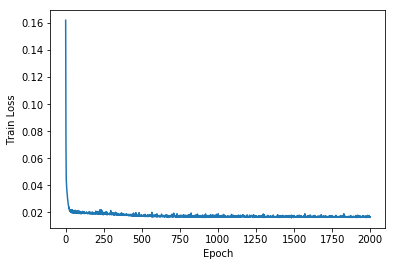

In [10]:
# Trained on 0 - 2000 epochs
plt.plot(model_output.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.show()

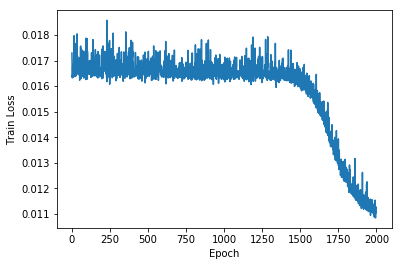

In [20]:
# Trained on 2000 - 4000 epochs
plt.plot(model_output.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.show()

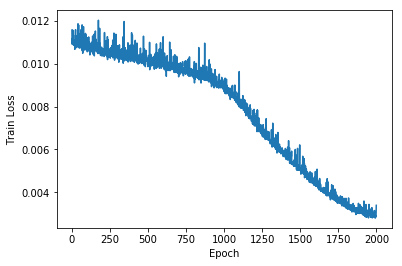

In [31]:
# Trained on 4000 - 6000 epochs
plt.plot(model_output.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.show()

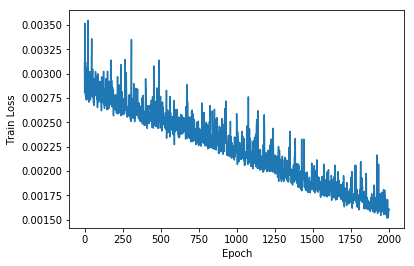

In [41]:
# Trained on 6000- 8000 epochs
plt.plot(model_output.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.show()

In [85]:
train_Y_predicted = model.predict(train_X)
test_Y_predicted = model.predict(test_X)

# invert the tranformation

trainPredict = scaler.inverse_transform(train_Y_predicted)
print(trainPredict)
testPredict = scaler.inverse_transform(test_Y_predicted)
print(testPredict)
trainY = scaler.inverse_transform(train_Y)
testY = scaler.inverse_transform(test_Y)

[[185.73924]
 [188.24498]
 [186.31082]
 [189.86603]
 [194.59296]
 [191.55768]
 [190.17812]
 [190.11235]
 [188.9258 ]
 [189.88367]
 [191.67978]
 [191.18459]
 [193.93616]
 [194.37242]
 [196.39105]
 [196.30807]]
[[194.22597]
 [190.96577]
 [196.99196]
 [193.02289]
 [196.33426]]


In [86]:
trainY.shape, trainPredict.shape

((16, 1), (16, 1))

In [87]:
print('RMSE Value for train predictions : ', math.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0])))
print('RMSE Value for test predictions : ', math.sqrt(mean_squared_error(testY[:,0], testPredict[:,0])))

RMSE Value for train predictions :  0.5779456314966939
RMSE Value for test predictions :  5.562931851738898


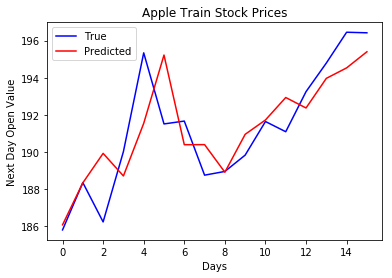

In [55]:
plot(trainY, trainPredict, 'Apple Train Stock Prices')
## The train graph plots the next day open price of the Apple Stock where the Red line is the predicted value of the model and the blue line is the actual value of the Apple Stock Price

In [88]:
import matplotlib.ticker as ticker
def plot(Y_true, Y_predicted, title):
    X_values = range(Y_true.shape[0])
    fig, ax = plt.subplots()
    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_major_locator(ticker.MaxNLocator(integer=True))
    ax.plot(X_values, Y_true[:,0], 'b', label='True')
    ax.plot(X_values, Y_predicted[:,0], 'r', label='Predicted')
    plt.xlabel('Days')
    plt.ylabel('Next Day Open Value')
    plt.title(title)
    plt.legend(loc='upper left')
    plt.show()

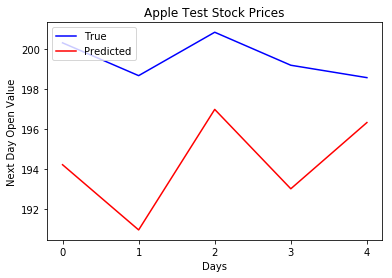

In [89]:
## TEST ON UNSEEN DATA #Trained with 6000 epochs 
## The following graph shows the next day open stock value price of the Apple Stock, the Red line shows the prediction from the model while the blue line shows the actual value for the next day of the Apple Stock price
plot(testY, testPredict, 'Apple Test Stock Prices')